<a href="https://colab.research.google.com/github/sasha704/conjure/blob/main/docs/tutorials/notebooks/NumberPuzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Number puzzle**
Original [Conjure Docs Number Puzzle](https://conjure.readthedocs.io/en/latest/tutorials.html#number-puzzle) by András Salamon, Özgür Akgün. Adapted by Alex Gallagher.

We first show how to solve a classic [word addition](https://en.wikipedia.org/wiki/Verbal_arithmetic) puzzle, due to Dudeney \[[Dud24](https://conjure.readthedocs.io/en/latest/zreferences.html#id3)\]. This is a small toy example, but already illustrates some interesting features of Conjure.

SEND

\+ MORE

-------

= MONEY

Here each letter represents a numeric digit in an addition, and we are asked to find an assignment of digits to letters so that the number represented by the digits SEND when added to the number represented by MORE yields the number represented by MONEY.

##**Installing conjure**

Before we can run any conjure in the jupyter notebook, we first need to install it.

In [ ]:
!source <(curl -s https://raw.githubusercontent.com/conjure-cp/conjure-notebook/v0.0.2/scripts/install-colab.sh)
%load_ext conjure

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   711  100   711    0     0   2693      0 --:--:-- --:--:-- --:--:--  2693
Installing Conjure...
Conjure: The Automated Constraint Modelling Tool
Release version 2.3.0
Repository version 987ee3fc3 (2022-06-10 21:50:17 +0100)
The conjure extension is already loaded. To reload it, use:
  %reload_ext conjure


Here the Conjure extension has been installed and loaded within the notebook.

## **Initial model and running Conjure**

We are looking for a mapping (a function) from letters to digits. We can represent the different letters as an enumerated type, with each letter appearing only once.

In [ ]:
language Essence 1.3
letting letters be new type enum {S,E,N,D,M,O,R,Y}
find f : function letters --> int(0..9)
such that
                   1000 * f(S) + 100 * f(E) + 10 * f(N) + f(D) +
                   1000 * f(M) + 100 * f(O) + 10 * f(R) + f(E) =
    10000 * f(M) + 1000 * f(O) + 100 * f(N) + 10 * f(E) + f(Y)

IndentationError: ignored

Running this cell causes an error. This is because the cell is missing the "Conjure magic" required to write Essence in the notebook. 

Let's add the line `%%conjure` to the top of the cell and use Conjure to find the solution:

In [ ]:
%%conjure
language Essence 1.3
letting letters be new type enum {S,E,N,D,M,O,R,Y}
find f : function letters --> int(0..9)
such that
                   1000 * f(S) + 100 * f(E) + 10 * f(N) + f(D) +
                   1000 * f(M) + 100 * f(O) + 10 * f(R) + f(E) =
    10000 * f(M) + 1000 * f(O) + 100 * f(N) + 10 * f(E) + f(Y)

{'f': {'D': 0, 'E': 0, 'M': 0, 'N': 0, 'O': 0, 'R': 0, 'S': 0, 'Y': 0}}

Here the solution is stored in f.

Let's try printing f in Python:

In [ ]:
print(f)

{'D': 0, 'E': 0, 'M': 0, 'N': 0, 'O': 0, 'R': 0, 'S': 0, 'Y': 0}


This is clearly not what we wanted. We haven’t specified all the constraints in the problem!

## **Identifying a missing constraint**

In these kinds of puzzles, usually we need each letter to map to a different digit: we need an injective function. Let’s replace the line

`find f : function letters --> int(0..9)`

by

`find g : function (injective) letters --> int(0..9)`

Now let’s run Conjure again on the new model:

In [ ]:
%%conjure
language Essence 1.3
find g : function (injective) letters --> int(0..9)
such that
                   1000 * g(S) + 100 * g(E) + 10 * g(N) + g(D) +
                   1000 * g(M) + 100 * g(O) + 10 * g(R) + g(E) =
    10000 * g(M) + 1000 * g(O) + 100 * g(N) + 10 * g(E) + g(Y)

{'f': {'D': 0, 'E': 0, 'M': 0, 'N': 0, 'O': 0, 'R': 0, 'S': 0, 'Y': 0},
 'g': {'D': 7, 'E': 8, 'M': 0, 'N': 1, 'O': 3, 'R': 6, 'S': 2, 'Y': 5}}

Here we don't need to redefine letters as it has already been defined in a cell above. As can be seen in the output, `f` doesn't disappear with the definition of `g`.

This time the solution looks more like what we wanted:

In [ ]:
print (g)

{'D': 7, 'E': 8, 'M': 0, 'N': 1, 'O': 3, 'R': 6, 'S': 2, 'Y': 5}


## **Final model**

There is still something strange with `g`. We usually do not allow a number to begin with a zero digit, but the solution maps M to 0. Let’s add the missing constraints to `h` and try again:

In [ ]:
%%conjure
language Essence 1.3
find h : function (injective) letters --> int(0..9)
such that
                   1000 * h(S) + 100 * h(E) + 10 * h(N) + h(D) +
                   1000 * h(M) + 100 * h(O) + 10 * h(R) + h(E) =
    10000 * h(M) + 1000 * h(O) + 100 * h(N) + 10 * h(E) + h(Y)

such that h(S) > 0, h(M) > 0

{'f': {'D': 0, 'E': 0, 'M': 0, 'N': 0, 'O': 0, 'R': 0, 'S': 0, 'Y': 0},
 'g': {'D': 7, 'E': 8, 'M': 0, 'N': 1, 'O': 3, 'R': 6, 'S': 2, 'Y': 5},
 'h': {'D': 7, 'E': 5, 'M': 1, 'N': 6, 'O': 0, 'R': 8, 'S': 9, 'Y': 2}}

Here we can see `h`, along with the previously generated `f` and `g`.

This now leads to the solution we expected:

In [ ]:
print (h)

{'D': 7, 'E': 5, 'M': 1, 'N': 6, 'O': 0, 'R': 8, 'S': 9, 'Y': 2}


Finally, let’s check that there are no more solutions:

Open the settings page using `%conjure_settings` and navigate to "General settings". Change the number of solutions box to "all".

In [ ]:
%conjure_settings

Now let's try again, first clearing the previous models:

In [ ]:
%conjure_clear

Conjure model cleared


This clears the definitions of `f`, `g`, and `h`.

In [ ]:
%%conjure
language Essence 1.3
find f : function (injective) letters --> int(0..9)
such that
                   1000 * f(S) + 100 * f(E) + 10 * f(N) + f(D) +
                   1000 * f(M) + 100 * f(O) + 10 * f(R) + f(E) =
    10000 * f(M) + 1000 * f(O) + 100 * f(N) + 10 * f(E) + f(Y)

such that f(S) > 0, f(M) > 0

Exception: Error: Undefined reference to a domain: letters



This results in an error because `letters` is no longer defined. 

Let's add the definition for `letters` back in, and try again:

In [ ]:
%%conjure
language Essence 1.3
letting letters be new type enum {S,E,N,D,M,O,R,Y}
find f : function (injective) letters --> int(0..9)
such that
                   1000 * f(S) + 100 * f(E) + 10 * f(N) + f(D) +
                   1000 * f(M) + 100 * f(O) + 10 * f(R) + f(E) =
    10000 * f(M) + 1000 * f(O) + 100 * f(N) + 10 * f(E) + f(Y)

such that f(S) > 0, f(M) > 0


{'f': {'D': 7, 'E': 5, 'M': 1, 'N': 6, 'O': 0, 'R': 8, 'S': 9, 'Y': 2}}

This confirms that there is indeed only one solution. As an exercise, verify that the first two models have multiple solutions, and that the solution given by the third model is among these. (The first has 1155 solutions, the second 25.)

## **Visualisations**

We can print the final result `f` using python:

In [ ]:
for key in f:
  print(key+" -> "+str(f[key]))

D -> 7
E -> 5
M -> 1
N -> 6
O -> 0
R -> 8
S -> 9
Y -> 2


We can also draw the function as a graph:

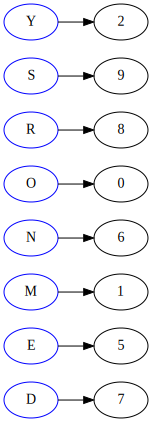

In [ ]:
from graphviz import Digraph

# Create Digraph object

dot = Digraph()
edges = []

for k, v in f.items():
  dot.node(str(k),color='blue')
  dot.node(str(v))
  edges.append([str(k), str(v)])


dot.edges(edges)
dot.graph_attr['rankdir'] = 'LR'
 

# Visualize the graph

dot